## Classificazione
Le reti neurali possono risolvere i problemi di regressione. Ora applicheremo le reti neurali a un altro comune problema di apprendimento automatico: la **classificazione**. Quasi tutto ciò che abbiamo imparato finora è ancora valido. La differenza principale sta nella funzione di perdita che utilizziamo e nel tipo di output che vogliamo che lo strato finale produca.

## Classificazione binaria
La **classificazione** in una delle due classi è un problema comune dell'apprendimento automatico. Si potrebbe voler prevedere se un cliente ha intenzione di fare un acquisto, se una transazione con carta di credito è stata fraudolenta o meno, se i segnali dello spazio profondo mostrano la presenza di un nuovo pianeta o se un test medico mostra la presenza di una malattia. Questi sono tutti problemi di classificazione binaria.

Nei dati grezzi, le classi potrebbero essere rappresentate da stringhe come "Sì" e "No", o "Cane" e "Gatto". Prima di utilizzare questi dati, assegneremo un'etichetta alla classe: una classe sarà 0 e l'altra 1. L'assegnazione di etichette numeriche rende i dati utilizzabili da una rete neurale.

### Accuracy e cross-entropia
L'**accuracy** è una delle tante metriche utilizzate per misurare il successo di un problema di classificazione. L'**accuratezza** è il rapporto tra le previsioni corrette e le previsioni totali: 
$$ accuratezza= \left(\frac{numero_{corretto}}{totale}\right) $$
Un modello che predice sempre correttamente avrebbe un punteggio di accuratezza pari a 1,0. A parità di condizioni, l'accuratezza è un parametro ragionevole da utilizzare quando le classi del set di dati si presentano con la stessa frequenza.

Il problema dell'accuratezza (e della maggior parte delle altre metriche di classificazione) è che non può essere utilizzata come funzione di perdita. SGD ha bisogno di una funzione di perdita che cambi in modo uniforme, ma l'accuratezza, essendo un rapporto di conteggi, cambia a "salti". Dobbiamo quindi scegliere un sostituto che funga da funzione di perdita. Questo sostituto è la funzione di cross-entropia.

Ricordiamo che la _funzione di perdita_ definisce l'obiettivo della rete durante l'addestramento. Con la regressione, l'obiettivo era minimizzare la distanza tra il risultato atteso e quello previsto. Per misurare questa distanza abbiamo scelto la **MAE**.

Per la **classificazione**, invece, vogliamo una **distanza tra le probabilità**, e questo è ciò che ci fornisce l'_entropia incrociata_. L'**entropia incrociata** è una sorta di misura della distanza tra una distribuzione di probabilità e un'altra.
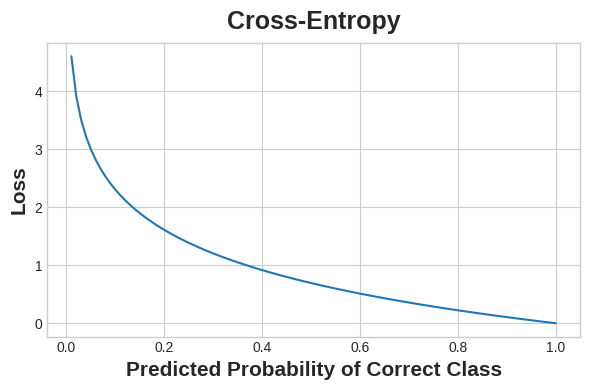

L'idea è che vogliamo che la nostra rete preveda la classe corretta con una probabilità di 1,0. Più la probabilità prevista è lontana da 1,0, maggiore sarà la perdita di cross-entropia.

Le ragioni tecniche per cui usiamo l'entropia incrociata sono un po' sottili, ma la cosa principale da trarre da questa sezione è proprio questa: usate l'entropia incrociata per una perdita di classificazione; altre metriche a cui potreste tenere (come l'accuratezza) tenderanno a migliorare insieme ad essa.

### Creare probabilità con la funzione sigmoide
Le funzioni **cross-entropy** e **accuracy** richiedono entrambe come input delle probabilità, cioè numeri da 0 a 1. Per convertire in probabilità le uscite a valore reale prodotte da uno strato denso, si utilizza un nuovo tipo di funzione di attivazione, l'**attivazione sigmoide**.
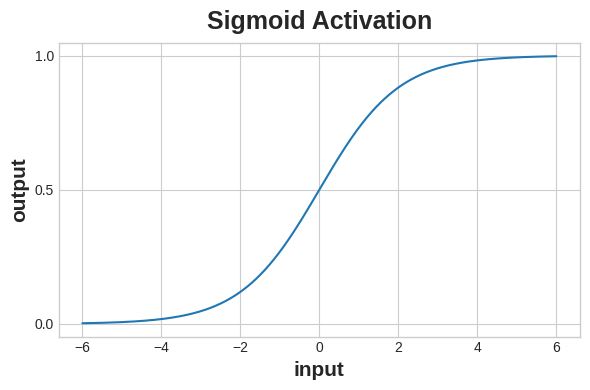
Per ottenere la previsione finale della classe, si definisce una soglia di probabilità. Di solito questa soglia è 0,5, in modo che l'arrotondamento ci fornisca la classe corretta: al di sotto di 0,5 significa che la classe ha l'etichetta 0 e 0,5 o più significa che la classe ha l'etichetta 1. Una soglia di 0,5 è quella che **Keras** utilizza di default con la sua metrica di precisione.

### Esempio 
**Classificazione binaria**

Il dataset Ionosfera contiene caratteristiche ottenute da segnali radar focalizzati sullo strato della ionosfera dell'atmosfera terrestre. Il compito è quello di determinare se il segnale mostra la presenza di qualche oggetto o solo aria vuota.

In [1]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intro to Deep Learning/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


Definiremo il nostro modello proprio come abbiamo fatto per i compiti di regressione, con un'eccezione. Nello strato finale includiamo un'attivazione '**sigmoid**', in modo che il modello produca probabilità di classe.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

Aggiungere la perdita di entropia incrociata e la metrica di precisione al modello con il metodo **compile**. Per i problemi a due classi, assicurarsi di utilizzare la versione "**binary**". (I problemi con più classi saranno leggermente diversi). L'**ottimizzatore Adam** funziona benissimo anche per la classificazione, quindi continueremo a usarlo.

In [3]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

Il modello in questo particolare problema può impiegare parecchie epoche per completare l'addestramento, quindi includeremo un callback di arresto anticipato per comodità.

In [4]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Come sempre, osserveremo le curve di apprendimento e controlleremo anche i valori migliori per la perdita e l'accuratezza ottenuti sul set di validazione. (Ricordate che l'arresto anticipato ripristinerà i pesi a quelli che hanno ottenuto questi valori).

Best Validation Loss: 0.5752
Best Validation Accuracy: 0.7619


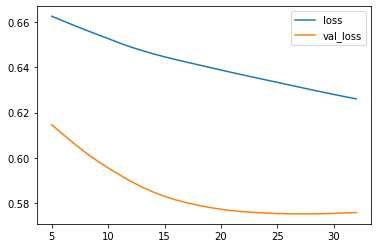

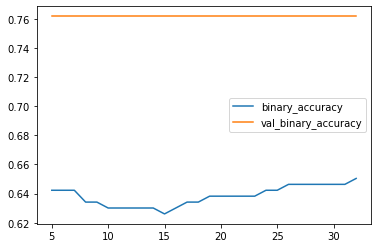

In [5]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

## Esercizi
In questo esercizio si costruirà un modello per prevedere le cancellazioni degli hotel con un classificatore binario.

In [6]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex6 import *

E:\Users\Alessio\anaconda3\lib\site-packages\learntools\deep_learning_intro\ex6.py:52: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if layer.__class__.__name__ is 'Dense']
E:\Users\Alessio\anaconda3\lib\site-packages\learntools\deep_learning_intro\ex6.py:59: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if layer.__class__.__name__ is 'Dense']


Per prima cosa, caricare il dataset Cancellazioni alberghiere.

In [7]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intro to Deep Learning/hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

### Definisci il Modello
Il modello che useremo questa volta avrà sia la normalizzazione dei batch che i livelli di dropout. Per facilitare la lettura, abbiamo suddiviso il diagramma in blocchi, ma è possibile definirlo strato per strato come al solito.

Definire un modello con un'architettura data da questo diagramma:
<figure style="padding: 1em;">
<img src="https://i.imgur.com/V04o59Z.png" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Diagram of a binary classifier.</center></figcaption>
</figure>


In [10]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
q_1.assert_check_passed()

# Check your answer
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### Add Optimizer, Loss e Metric
Ora compiliamo il modello con l'ottimizzatore Adam e le versioni binarie della perdita di entropia incrociata e della metrica di precisione.

In [12]:
# YOUR CODE HERE
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

# Check your answer
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Infine, eseguire questa cella per addestrare il modello e visualizzare le curve di apprendimento. L'esecuzione può durare circa 60-70 epoche, il che potrebbe richiedere uno o due minuti.

Epoch 1/200
175/175 [==============================] - 1s 5ms/step - loss: 0.4860 - binary_accuracy: 0.7693 - val_loss: 0.4315 - val_binary_accuracy: 0.8055
Epoch 2/200
175/175 [==============================] - 1s 4ms/step - loss: 0.4239 - binary_accuracy: 0.8001 - val_loss: 0.4009 - val_binary_accuracy: 0.8140
Epoch 3/200
175/175 [==============================] - 1s 4ms/step - loss: 0.4097 - binary_accuracy: 0.8082 - val_loss: 0.3904 - val_binary_accuracy: 0.8209
Epoch 4/200
175/175 [==============================] - 1s 4ms/step - loss: 0.4031 - binary_accuracy: 0.8117 - val_loss: 0.3883 - val_binary_accuracy: 0.8225
Epoch 5/200
175/175 [==============================] - 1s 4ms/step - loss: 0.3969 - binary_accuracy: 0.8151 - val_loss: 0.3846 - val_binary_accuracy: 0.8226
Epoch 6/200
175/175 [==============================] - 1s 4ms/step - loss: 0.3937 - binary_accuracy: 0.8163 - val_loss: 0.3821 - val_binary_accuracy: 0.8240
Epoch 7/200
175/175 [==============================] - 1s 

<AxesSubplot:title={'center':'Accuracy'}>

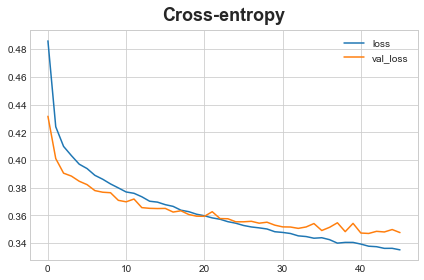

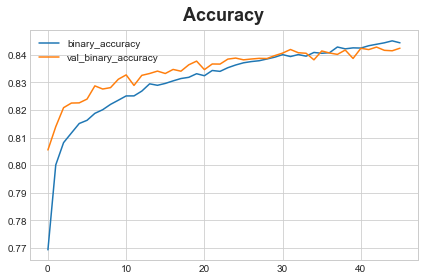

In [13]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

### Train e Valutazione
Cosa ne pensate delle curve di apprendimento? Sembra che il modello si sia adattato poco o troppo? La perdita di entropia incrociata è un buon indicatore dell'accuratezza?

In [14]:
# View the solution (Run this cell to receive credit!)
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Though we can see the training loss continuing to fall, the early stopping callback prevented any overfitting. Moreover, the accuracy rose at the same rate as the cross-entropy fell, so it appears that minimizing cross-entropy was a good stand-in. All in all, it looks like this training was a success!